# Machine Learning Case Study - Auto Insurance Claim Fraud Detection

<img src="https://raw.githubusercontent.com/urvipasad/Machine-Learning-Projects/master/Auto-Insurance-1.jpg" align='center' height="150" width="600"><br/>

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)
    - 3.1. [Importing Auto Insurance Claims Dataset](#section301)<br>
    - 3.2. [Description of the Dataset](#section302)<br>
    - 3.3. [Pandas Profiling before Data Preprocessing](#section303)<br>
4. [Data visualization and pre-processing](#section4)<br>
    - 4.1 [Data Preprocessing](#section401)<br>
       - 4.1.1. [Treat Property_damage Column](#section40101)<br>
       - 4.1.2. [Treat Police_report_available Column](#section40102)<br>
       - 4.1.3. [Treat Collision_type Column](#section40103)<br>
       - 4.1.4. [Find Correlated Columns](#section40104)<br>
       - 4.1.5. [Study the catagorical columns](#section40105)<br>
       - 4.1.6. [Age vs Months as Customer](#section40106)<br>
       - 4.1.7. [Pre-processing:  Feature selection/extraction](#section40107)<br>
       - 4.1.8. [Convert Categorical features to numerical values](#section40108)<br>
5. [Modeling](#section5)<br>
    - 5.1 [Define X and Y for Model Training](#section501)<br>
    - 5.2 [Train Test Split](#section502)<br>
    - 5.3 [Transformation/Scaling Train and Test Data](#section503)<br>
    - 5.4 [Logistic Regression Model](#section504)<br>
        - 5.4.1 [Logistic Regression - Model Evaluation](#section50401)<br>
    - 5.5 [Decision Tree](#section505)
        - 5.5.1 [Decision Tree - Model Evaluation](#section50501)
    -  5.6 [Decision Tree with Grid Search](#section506)
        - 5.6.1 [Decison Tree with Grid Search - Model Evaluation](#section50601)
    - 5.7 [Random Forest](#section507)
        - 5.7.1 [Random Forest - Model Evaluation](#section50701)
    - 5.8 [Random forest with Randomized Search CV](#section508)
        - 5.8.1 [Random forest with Randomized Search CV- Model Evaluation](#section50801)
6. [Model Evaluation Report](#section6)<br>
7. [Conclusion](#section7)<br>

<a id=section1></a>
## 1. Problem Statement


Fraud is a growing in every sector and in the insurance sector estimates billions of dollars fraud.

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Under this Casestudy, we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not. This will be a Binary Classification task, and we will be creating a Decision Tree model and Logistic Regression model.

Machine learning algorithms can simply eliminate human errors and separate unobserved fraud patterns by identifying
exceptions. Insurance companies rely on predictive models use the preceding cases of falsified actions.The machine
learning algorithms with new data have much more perfect fraud detections.


With the prediction data, we are able to estimate what our total predicted fradulent claim amount is like.

We will cover the following steps to illustrate how we build a Machine Learning Pipeline:

- Data Import
- Data Exploration
- Data Processing
- Feature Extraction
- Create Logistic Regression Model
- Create Decision Tree Model
- Measuring Error Rate
- Model Tuning using GridSearch

<a id=section2></a>
## 2. Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

 
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 40                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

<a id=section3></a>
## 3. Loading Data

Data is collected from below site.

https://www.kaggle.com/buntyshah/auto-insurance-claims-data


<a id=section301></a>
### 3.1 Importing Auto Insurance Claims Dataset

In [2]:
data = pd.read_csv('insurance_claims.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


<a id=section302></a>
### 3.2 Description of the Dataset
|  Column |  Description |
| ------------ | ------------ |
| months_as_customer  | Total months from when the policy issued   |
| age  |  Age of the Insured |
| policy_number  | policy number of the Insured  |
|  policy_bind_date | when the policy or endorsement is issued by the insurance company.  |
|  policy_state | State in which the policy is issued  |
| policy_csl  | CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.  |
|  policy_deductable | Policy deductible is the amount paid out of pocket by the policy holder before an insurance provider will pay any expenses.  |
|  policy_annual_premium | annual premium paid for this policy  |
|   umbrella_limit| An umbrella limit is extra liability insurance coverage that goes beyond the limits of the insured's auto insurance   |
|  insured_zip |  Zipcode of the policy  |
|  insured_sex | Sex of the Insured  |
|  insured_education_level |  education of the Insured |
|  insured_occupation | Occupation of the Insured  |
| insured_hobbies  | Hobbies of Insured  |
| insured_relationship  | Relationship with Insured  |
| capital-gains  | Captial gain in the insurance claim |
| capital-loss  |  Captial gain in the insurance claim |
|  incident_date | Date on which the Incident happended  |
| incident_type  |  Type of Incident like Multi-vehicle Collision, Single Vehicle Collision, Parrked Car or Theft |
|  collision_type | Type of collision like Front Collision, Rear Collision or Side Collision  |
|  incident_severity |   Severity of Incient  like minor damager, major Damage, Total Loss or Trivial Damage |
| authorities_contacted  |  Authorities Contacted for reporting the incident like Police, Fire or ambulance |
|   incident_state|  State of the incident  |
| incident_city  |Cite of the incident   |
|  incident_location |  Location of the incident |
| incident_hour_of_the_day  | Hour at which incident happened  |
|  number_of_vehicles_involved | Number of vehicles collapsed   |
|  property_damage | Property damager or not  |
| bodily_injuries  | Any Bodily injuries reported  |
| witnesses  | Any witness of the incident  |
|  police_report_available |  Any policy report available |
|  total_claim_amount |  Total claim amount which is summation of injury claim, Property claim & vehicle claim |
|injury_claim   |  Injury Claim |
| property_claim  | Property Claim  |
|  vehicle_claim | Vehicle Claim  |
|  auto_make | Make of the Vehicle  |
| auto_model  |  Model of the Vehicle |
|  auto_year |  Year of purchase of the Vehicle |
| _c39  |   Unknown column|


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

Using ```info``` we get following insight from **data**
* There are **1000** rows and **40** columns
* _c39 is an unknown column has no data at all 
* **17** columns are of type **Integer**, **2** columns are of **float** type and **21** are **Object** column

In [4]:
data.describe(include = 'all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,2,7,14,20,6,NaN,NaN,60,4,4,4,5,7,7,1000,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2,NaN
top,NaN,NaN,NaN,1992-08-05,OH,250/500,NaN,NaN,NaN,NaN,FEMALE,JD,machine-op-inspct,reading,own-child,NaN,NaN,2015-02-02,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,1491 Francis Ridge,NaN,NaN,?,NaN,NaN,NO,NaN,NaN,NaN,NaN,Dodge,RAM,NaN,N,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,537,161,93,64,183,NaN,NaN,28,419,292,354,292,262,157,1,NaN,NaN,360,NaN,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,NaN,NaN,NaN,NaN,NaN,25126.100000,-26793.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.644000,1.83900,NaN,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,NaN,NaN,NaN,NaN,NaN,27872.187708,28104.096686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951373,1.01888,NaN,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,NaN,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-51500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.00000,NaN,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-23250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.00000,NaN,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,NaN,NaN,NaN,NaN,NaN,51025.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.00000,NaN,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN,NaN


> **Using ```describe``` we get following insight**
> - There **1000** rows in this dataset with 40 Columns out of which 19 Columns are numeric and 21 columns are Categorical.Need to evaluate the categorical columns to standardise the data for Model.
> - **Policy number** is unique Id and can be dropped for Machine learning models
> - **property_damage** and **police_report_available** has values with ?. Need to clean this data
> - Highested claims are reported in NY
> - For Capital gains column there seem to be an outlier 100500.000000. **Need to Check**
> - **c_39** has no data. Drop this column

In [5]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
data[data['capital-gains'] > 80000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
32,155,35,336614,2003-08-01,IL,500/1000,1000,1088.34,0,614780,FEMALE,Associate,adm-clerical,yachting,other-relative,81100,0,2015-02-24,Multi-vehicle Collision,Front Collision,Total Loss,Police,NY,Arlington,6092 5th Ave,16,3,YES,2,3,NO,29790,3310,3310,23170,BMW,3 Series,2008,N,NaN
53,223,40,729634,1994-04-28,IN,100/300,500,1201.41,0,437818,FEMALE,JD,priv-house-serv,movies,husband,88400,-46500,2015-01-27,Multi-vehicle Collision,Side Collision,Major Damage,Police,NC,Columbus,7466 MLK Ridge,7,3,YES,1,0,?,70510,12820,12820,44870,Suburu,Forrestor,1999,N,NaN
59,151,36,485372,2005-02-26,OH,250/500,2000,870.63,0,431725,FEMALE,MD,adm-clerical,kayaking,own-child,94800,-58500,2015-01-06,Multi-vehicle Collision,Side Collision,Minor Damage,Police,VA,Hillsdale,2299 1st St,12,3,NO,1,1,NO,62920,11440,5720,45760,Ford,Escape,2000,N,NaN
93,219,43,731450,2010-12-29,IN,100/300,1000,1483.25,0,465100,FEMALE,MD,exec-managerial,exercise,not-in-family,90700,-20800,2015-02-09,Multi-vehicle Collision,Front Collision,Major Damage,Ambulance,NC,Riverwood,1135 Solo Lane,3,3,NO,1,1,?,70680,5890,11780,53010,Ford,Fusion,2009,N,NaN
135,171,34,964657,1997-02-18,IN,250/500,2000,1277.25,0,605169,FEMALE,College,exec-managerial,yachting,other-relative,84900,0,2015-01-19,Single Vehicle Collision,Rear Collision,Major Damage,Police,NY,Springfield,8668 Flute St,14,1,NO,1,2,?,69200,13840,6920,48440,Volkswagen,Passat,1996,Y,NaN
171,119,28,288580,2012-11-22,OH,250/500,2000,1079.92,0,430886,MALE,High School,machine-op-inspct,hiking,husband,88800,0,2015-02-26,Single Vehicle Collision,Rear Collision,Total Loss,Ambulance,PA,Riverwood,7534 MLK Hwy,1,1,?,0,1,YES,53600,6700,6700,40200,Volkswagen,Jetta,2007,Y,NaN
272,332,47,994538,1991-11-01,IL,100/300,2000,1083.01,0,448882,MALE,MD,craft-repair,paintball,other-relative,91900,0,2015-01-31,Multi-vehicle Collision,Front Collision,Major Damage,Police,WV,Arlington,9239 Washington Ridge,22,4,YES,2,0,?,71760,11040,11040,49680,Jeep,Grand Cherokee,2010,Y,NaN
305,175,34,771236,1995-05-29,OH,100/300,500,915.29,0,607893,FEMALE,JD,handlers-cleaners,base-jumping,wife,82400,-57100,2015-02-23,Single Vehicle Collision,Front Collision,Major Damage,Other,NY,Arlington,5224 5th Lane,14,1,?,2,1,YES,36720,4080,4080,28560,Honda,Accord,2009,Y,NaN
310,253,41,261315,2013-04-10,OH,100/300,2000,1312.75,0,471453,FEMALE,PhD,sales,dancing,other-relative,81300,0,2015-01-01,Multi-vehicle Collision,Rear Collision,Major Damage,Other,SC,Springfield,4671 5th Ridge,10,3,NO,2,2,YES,80740,7340,14680,58720,Toyota,Camry,2014,Y,NaN
380,265,41,626074,1997-09-29,IN,250/500,2000,1724.46,6000000,432491,FEMALE,Associate,craft-repair,sleeping,own-child,81800,0,2015-01-13,Multi-vehicle Collision,Side Collision,Total Loss,Police,SC,Northbend,1985 5th Ave,18,3,?,1,3,?,44200,4420,4420,35360,Audi,A5,2014,N,NaN


<a id=section303></a>
### 3.3 Pandas Profiling before Data Preprocessing

In [7]:
import pandas_profiling 
profile = data.profile_report(title="Auto Insurance Claim")
profile.to_file(output_file="Auto Insurance Claim_Data_profiling_before_preprocessing.html")

> From pandas Profile below are the analysis
 > - **Duplicate rows	0 (0.0%)**
 > - **_c39 has 1000 (100.0%) missing values** : **Drop This Column**
 > - **incident_date** only contains datetime values, but is categorical. Consider applying pd.to_datetime()
 > - **policy_bind_date** only contains datetime values, but is categorical. Consider applying pd.to_datetime()
 > - **months_as_customer** is highly correlated with **age**
 > - **vehicle_claim** is highly correlated with **total_claim_amount**
 > - **auto_model** is highly correlated with **auto_make**
 > - collision_type there are 178 rows with ? > Need to clean this up
 > - **Fraud  Y = 247 and Fraud N = 753. There is some imbalance in the data**
 > - **police_report_available** has **343** rows with **?**. Need to treat this column for ML Models

<a id=section4></a>
## 4. Data visualization and pre-processing
 
<a id=section401></a>
### 4.1 Data Preprocessing
 > - There are columns like **police_report_available, collision_type and  Property_damage** for which value few records have missing values and it is shown as ?. Lets treat these columns to fill the missing values.
 > - Drop _c39 column as this column has no data at all
 > - Check the correlation between all columns and decide on which columns are more important for our Model
 > - Study the catogarical columns and decide on which all categorical column can be used in our model.

<a id=section40101></a>
### 4.1.1 Treat Property_damage Column

In [8]:
data[data['property_damage'] == '?']['property_damage'].count() 

360

> There are 360 rows for which Property damage is not known. Let's See if the Property Damage is linked to Property Claim columns.


Text(0.5, 1.0, 'property_damage vs property_claim')

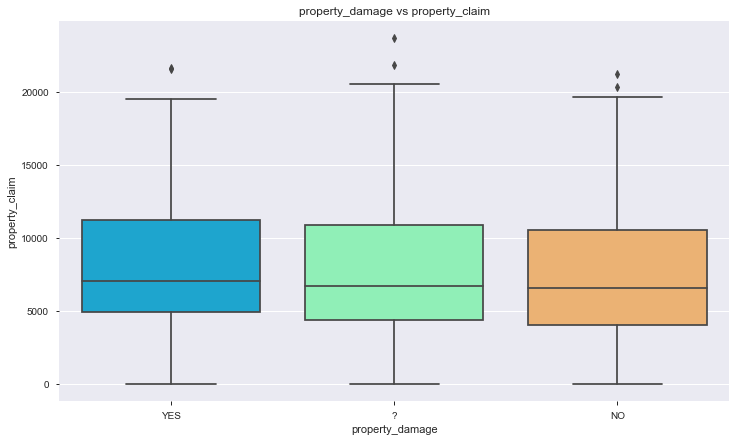

In [9]:

plt.figure(figsize=(12,7))
sns.boxplot(data=data, x='property_damage', y='property_claim', palette='rainbow')

plt.title('property_damage vs property_claim')

> - From the above box plot it seems that **property damage has no relation with Property Claim**. Because if Propery Damage is yes then property claim should be high and if property damage is no then property Claim should be nill but this assumption is not true from above plot.
> - **Let see how this column is related to Fraud or not fraud and accordingly we can decide how can we treat this ? rows.**

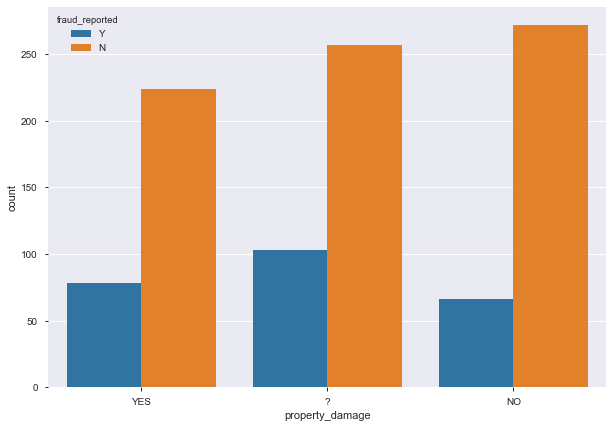

In [10]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x='property_damage',hue='fraud_reported',data=data)

> From the above graph it is difficult to say that **property_damage = ? has no relation with Fraud reported or not**. Hence to treat these rows we can **add a new value = 'Maybe' instead of populating it with Yes or No value**. This is to ensure that this column does not loose its importance in the Model

In [11]:
## Replace ? with new value ' Maybe' to ensure that this column does not loose it's importance in model
data['property_damage'].replace(to_replace='?', value='Maybe', inplace=True) 

In [12]:
data[data['property_damage'] == 'Maybe']['property_damage'].count() 

360

<a id=section40102></a>
### 4.1.2 Treat Police_report_available Column

> For **police_report_available column also there are rows with ?**.Lets us **treat this column** similar to how we treated Property_damage.

In [13]:
data[data['police_report_available'] == '?']['police_report_available'].count() 

343

In [14]:
data['police_report_available'].mode()

0    ? 
1    NO
dtype: object

> For **police_report_available** there are **two modes No and ?**. hence we need to find out the is it right to **fill ? with No values**

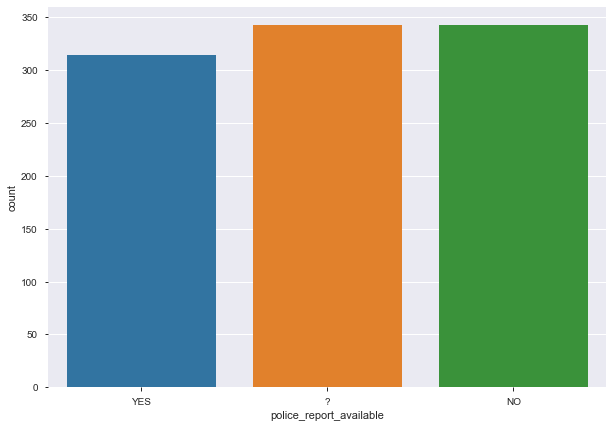

In [15]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x='police_report_available',data=data)

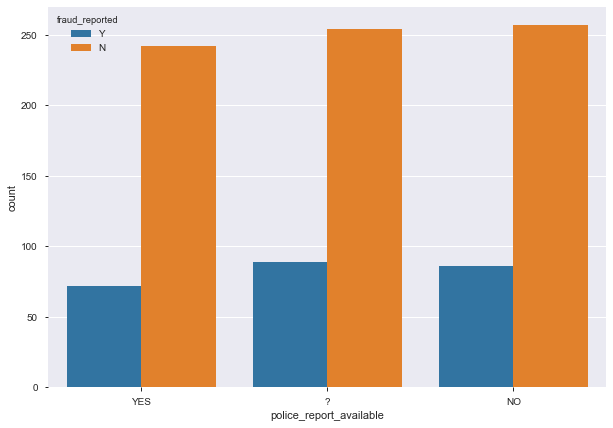

In [16]:
f, ax = plt.subplots(figsize=(10, 7))  ## Check how the fraud Report is related with Policy Report available
sns.countplot(x='police_report_available',hue = 'fraud_reported', data=data)

> **Issrepective of policy report available or not the fraud ratio has no change**. Now let us dig deeper to understand if the Police report available has any impact on the total claim amount.

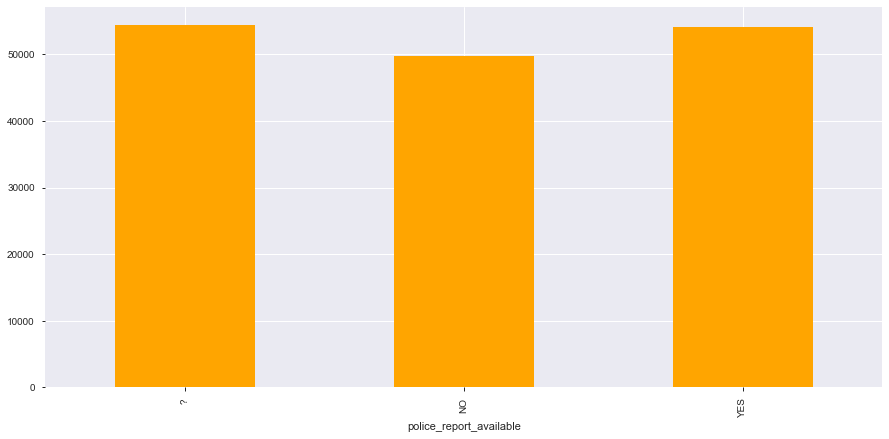

In [17]:
data.groupby(['police_report_available'])['total_claim_amount'].mean().plot(kind='bar', figsize=(15, 7), color='orange')

> From the above plot is it quite evident that the Total claim amount has no impact due to Policy report Yes or No hence let us **replace the ? with NO value only**.

In [18]:
data['police_report_available'].replace(to_replace='?', value='NO', inplace=True) ## Replace ? values with NO

<a id=section40103></a>
### 4.1.3 Treat Collision_type Column
> Let's treat the Collision_type = ? row to see how can we replace ? values.

In [19]:
## Analyse how collision type is linked with incident type
data.groupby(['incident_type', 'collision_type'])['incident_type','collision_type'].count() 

incident_type  collision_type
incident_type            collision_type                                
Multi-vehicle Collision  Front Collision  115            115           
                         Rear Collision   152            152           
                         Side Collision   152            152           
Parked Car               ?                84             84            
Single Vehicle Collision Front Collision  139            139           
                         Rear Collision   140            140           
                         Side Collision   124            124           
Vehicle Theft            ?                94             94

> **collision_type is ? for the incident like Parked car or vehicle Thef**t. Let us leave the collision type = ? and while creating dummies we can drop the ? column. 

<a id=section40104></a>
### 4.1.4 Find Correlated Columns
> Explore the correlation between all columns and accordingly select the columns for our model .
Establishing __coorelation__ between all the features using __heatmap__.

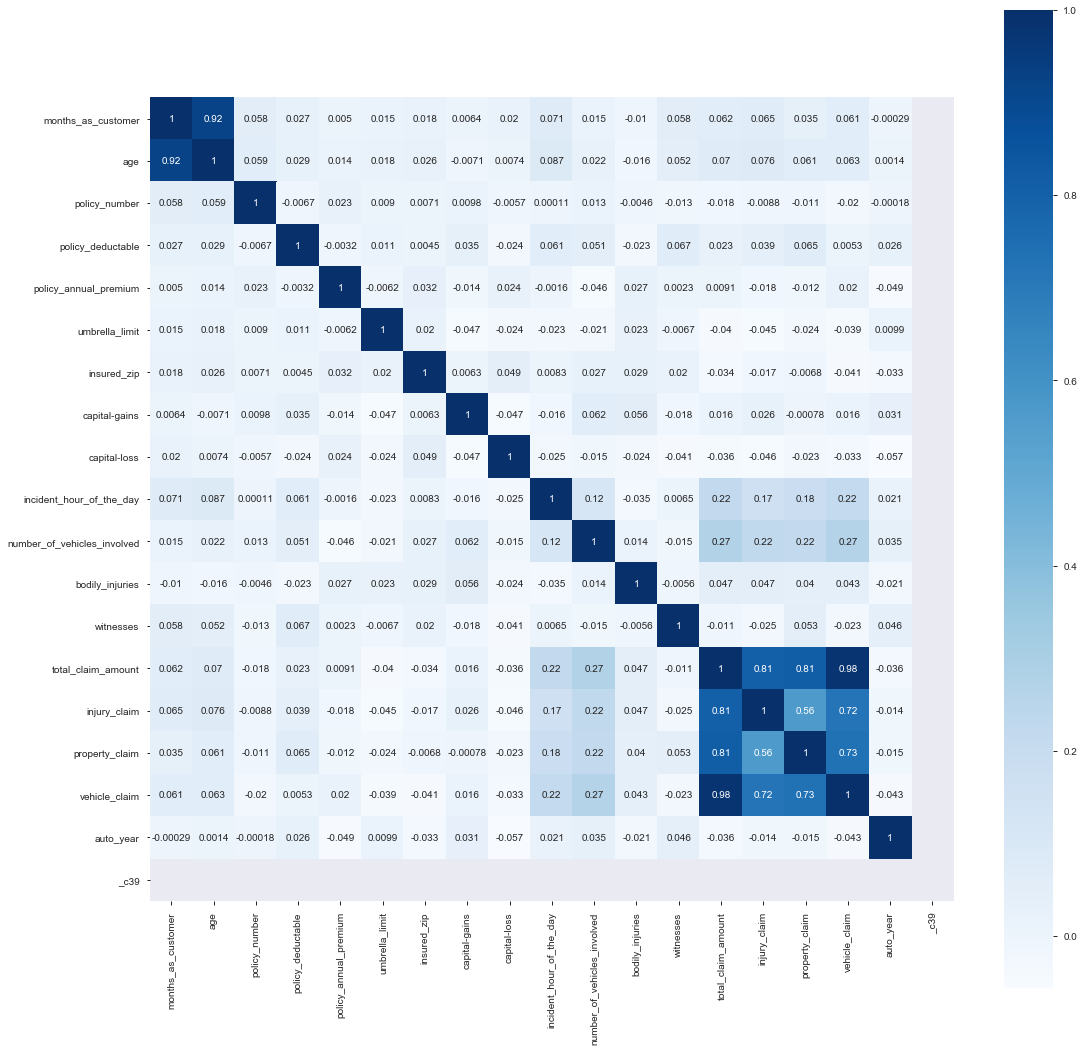

In [20]:
features_correlation = data.corr() ## Generate Correlation
plt.figure(figsize=(18,18))
sns.heatmap(features_correlation,vmax=1,square=True,annot=True,cmap='Blues')
plt.show()

> - **months_as_customer** is **highly correlated** with **Age**. Hence need to consider only one of this column in our model

> - **Vehicle claim, Injure claim and Property claim**  is **highly correlated** with **total claim amount** hence we can drop these column for our model. From our domain knowledge it is quite evident that **total claim is summation of vehicle claim, Injury claim and Property claim** hence it is quite obviouse that it is highly correlated..

>- Now let us see how each of these columns are related to our target variable fraud reported.


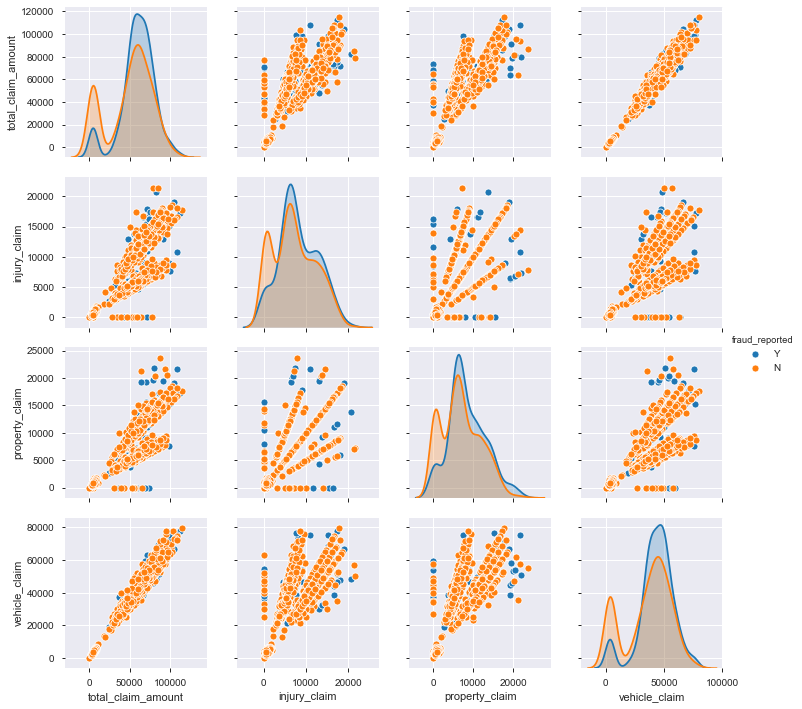

In [21]:
sns.pairplot(data=data[['total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim','fraud_reported']], size=2.5, diag_kind='kde', hue = 'fraud_reported')

> It is quite evident from above plots that when the **Total claim amount is high** then there are **very high chances that the claim is fraud**.

<a id=section40105></a>
### 4.1.5 Study the catagorical columns

In [22]:
list_columns = ['insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies','insured_relationship','incident_type', 'collision_type','incident_severity','authorities_contacted', 'property_damage','police_report_available','auto_make','auto_model']
for col in list_columns:
        print('\n {} \n'.format(col),data[col].unique())


 insured_sex 
 ['MALE' 'FEMALE']

 insured_education_level 
 ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

 insured_occupation 
 ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

 insured_hobbies 
 ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']

 insured_relationship 
 ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

 incident_type 
 ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

 collision_type 
 ['Side Collision' '?' 'Rear Collision' 'Front Collision']

 incident_severity 
 ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']



<a id=section40106></a>
### 4.1.6 Age vs Months as Customer
 > Months as customer is higly correlated with Age hence let us see if we remove one of this column from our model then is it going to have any impact

Text(0.5, 1.0, 'Violen plot showing the fraud_reported based months_as_customer')

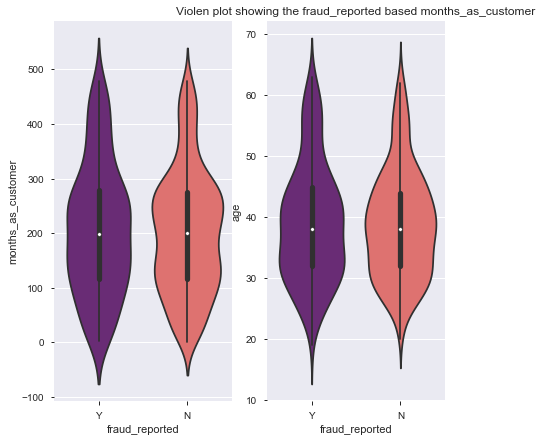

In [23]:
f,axes = plt.subplots(1, 2, figsize=(7, 7))      
sns.violinplot(data=data, x='fraud_reported', y='months_as_customer', palette='magma', ax=axes[0])
sns.violinplot(data=data, x='fraud_reported', y='age', palette='magma', ax=axes[1])
plt.title('Violen plot showing the fraud_reported based months_as_customer')

> - from above plot it is quite evident that behaviour of both these column with respect to Fraud is same hence we can drop one of this column from our model.

<a id=section40107></a>
### 4.1.7 Pre-processing:  Feature selection/extraction
At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.<br/> 
> - From pandas profiling it was clear that **Auto Model and Auto make are highly correlated**. Let us use **Auto make** for **our model** as this has  **less classes as compared to Auto model.** 
> - Based on our previous analysis it was quite clear that **age is highly correlated with Months as customer*. So lets use **months_as_customer for our model**
 > - **policy_number** is a **unique number** hence drop this from our model features.
 > Do not consider the unrelated columns like **policy_bind_date, policy_state', 'policy_csl',incident_date, incident_state,incident_city,incident_location, _c39** for our model.
 
**From the above finding lets decide our feature columns for the model**


In [24]:
features = ['months_as_customer','policy_deductable','policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss','incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day','number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount', 'auto_make', 'auto_year', 'fraud_reported']

In [25]:
X= data[features]

<a id=section40108></a>
### 4.1.8 Convert Categorical features to numerical values

In [26]:
## Define the categorical columns and generate dummies for it using pd.get_dummies
X = pd.get_dummies(X, columns=['insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies','insured_relationship','incident_type', 'collision_type','incident_severity','authorities_contacted', 'property_damage','police_report_available','auto_make'], drop_first=True)

In [27]:
X.head(5)

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,...,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,1000,1406.91,0,53300,0,5,1,1,2,71610,2004,Y,1,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,228,2000,1197.22,5000000,0,0,8,1,0,0,5070,2007,Y,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,34650,2007,N,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,2014,Y,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,2009,N,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> Convert the Fraud Reported Y & N values to Binary 1 & 0

In [28]:
# convert the fraud reported to binary values
X['fraud_reported'].replace(to_replace=['N','Y'], value=[0,1],inplace=True) 

In [29]:
X.columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'auto_year',
       'fraud_reported', 'insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
  

<a id=section5></a>
# 5. Modeling

<a id=section501></a>
## 5.1 Define X and Y for Model Training

In [30]:
Y = X['fraud_reported'] ## Define the target variable



In [31]:
Y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [32]:
X = X.loc[:,X.columns != 'fraud_reported'] ## Select all columns from features extracted earlier except Fraud Reported
X.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,1000,1406.91,0,53300,0,5,1,1,2,71610,2004,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,228,2000,1197.22,5000000,0,0,8,1,0,0,5070,2007,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,34650,2007,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,2014,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,2009,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id=section502></a>
## 5.2 Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_Test,y_train,y_test = train_test_split(X, Y, test_size=0.4, random_state=4)

<a id=section503></a>
## 5.3 Transformation/Scaling Train and Test Data

In [34]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_Test=  preprocessing.StandardScaler().fit(X_Test).transform(X_Test)

In [35]:
print("X train Shape : ",X_train.shape)
print("X test Shape : ",X_Test.shape)
print("Y train Shape : ",y_train.shape)
print("Y test Shape : ",y_test.shape)

X train Shape :  (600, 85)
X test Shape :  (400, 85)
Y train Shape :  (600,)
Y test Shape :  (400,)


<a id=section504></a>
## 5.4 LOGISTIC REGRESSION MODEL

In [36]:

from sklearn.linear_model import LogisticRegression
LogReg_model = LogisticRegression().fit(X_train,y_train)

In [37]:
y_pred = LogReg_model.predict(X_Test)

<a id=section50401></a>
### 5.4.1 LOGISTIC REGRESSION - MODEL EVALUATION

In [38]:

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cnf_matrix)

print('Precision score for test data using logistic Regression is:', precision_score(y_test,y_pred))
print('Recall score for test data using logistic Regression is:',recall_score(y_test,y_pred))   
print('F1_score for test data using logistic Regression is:',f1_score(y_test, y_pred))


Confusion Matrix: 
 [[266  26]
 [ 49  59]]
Precision score for test data using logistic Regression is: 0.6941176470588235
Recall score for test data using logistic Regression is: 0.5462962962962963
F1_score for test data using logistic Regression is: 0.6113989637305699


<a id=section505></a>
## 5.5 DECISION TREE

In [39]:
from sklearn import tree

DecisionTreeModel = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 8)

DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
y_predTree = DecisionTreeModel.predict(X_Test)

<a id=section50501></a>
### 5.5.1 DECISION TREE - MODEL EVALUATION

In [41]:


cnf_matrix = confusion_matrix(y_test, y_predTree)
print("Confusion Matrix: \n",cnf_matrix)
print('Precision score for test data using Decision Tree is:', precision_score(y_test,y_predTree))

print('Recall score for test data using Decision Tree is:',recall_score(y_test,y_predTree))  

print('F1_score for test data using Decision Tree is:',f1_score(y_test, y_predTree))



Confusion Matrix: 
 [[251  41]
 [ 40  68]]
Precision score for test data using Decision Tree is: 0.6238532110091743
Recall score for test data using Decision Tree is: 0.6296296296296297
F1_score for test data using Decision Tree is: 0.6267281105990784


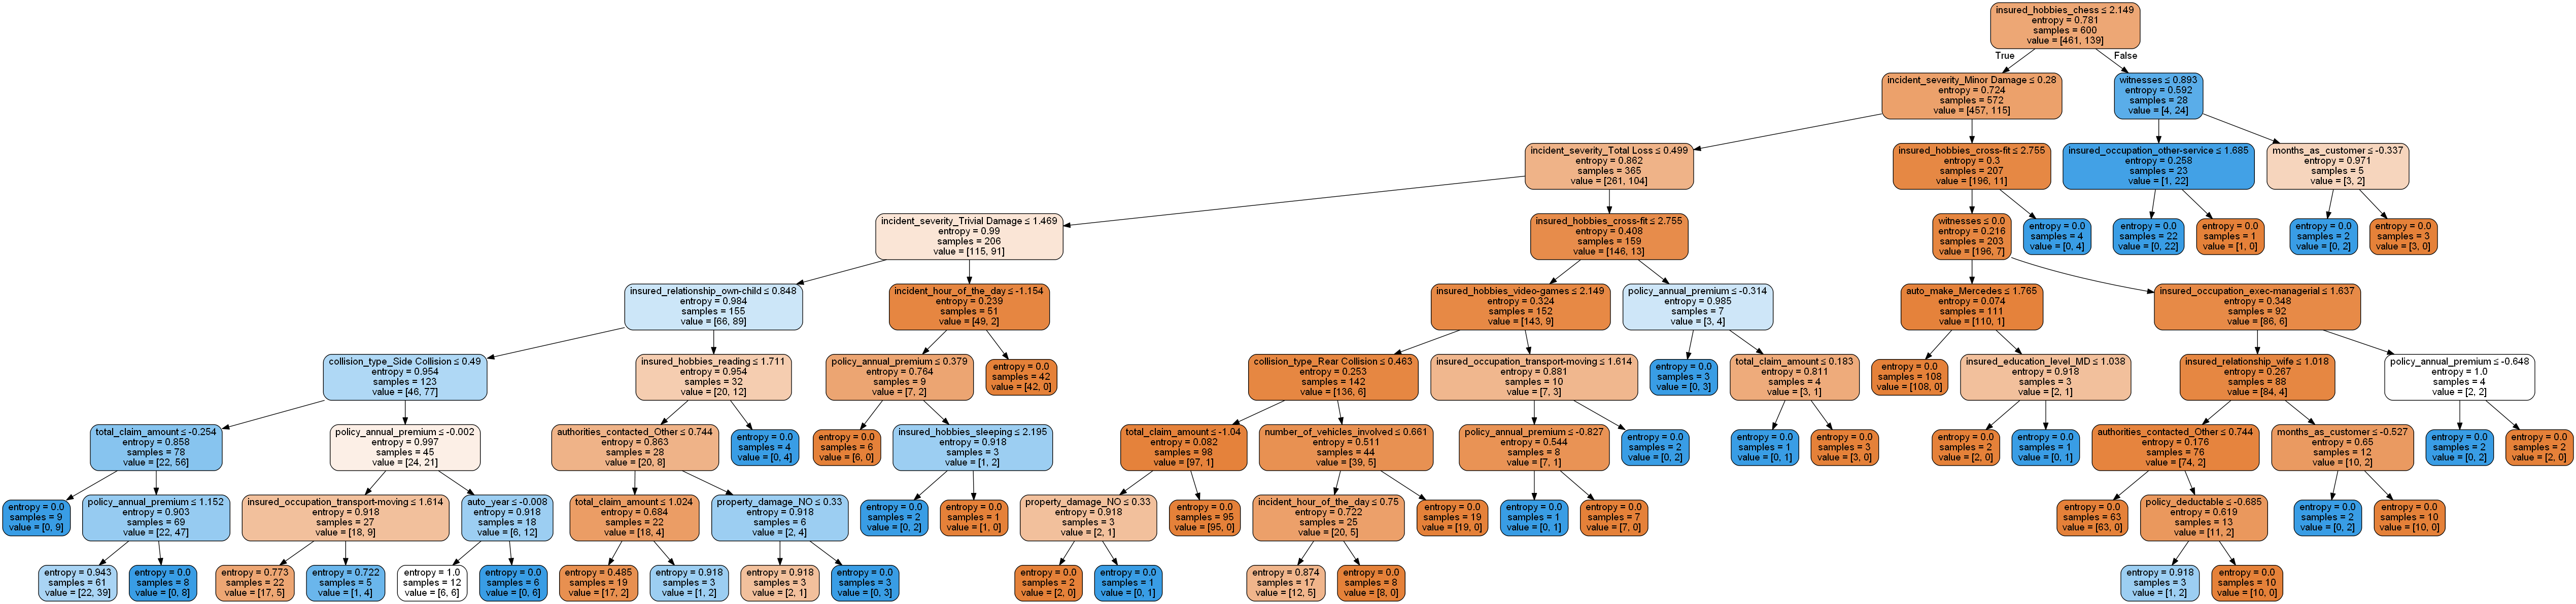

In [42]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(DecisionTreeModel, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())

<a id=section506></a>
## 5.6 DECISION TREE WITH GRID SEARCH

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)
y_pred_gridSearch = grid_search.predict(X_Test)

<a id=section50601></a>
### 5.6.1 DECISION TREE WITH GRID SEARCH - MODEL EVALUATION

In [44]:

cnf_matrix = confusion_matrix(y_test, y_pred_gridSearch)
print("Confusion Matrix: \n",cnf_matrix)
print('Precision score for test data using Decision Tree is:', precision_score(y_test,y_pred_gridSearch))

print('Recall score for test data using Decision Tree is:',recall_score(y_test,y_pred_gridSearch))  

print('F1_score for test data using Decision Tree is:',f1_score(y_test, y_pred_gridSearch))


Confusion Matrix: 
 [[248  44]
 [ 13  95]]
Precision score for test data using Decision Tree is: 0.6834532374100719
Recall score for test data using Decision Tree is: 0.8796296296296297
F1_score for test data using Decision Tree is: 0.7692307692307693


In [45]:
grid_search.best_params_ ## Check the Parameter for best results

{'criterion': 'entropy', 'max_depth': 4, 'max_features': None}

In [46]:
grid_search.best_estimator_ ## check the best estimators

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

<a id=section507></a>
## 5.7 RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)


model.fit(X_train, y_train)
y_RF_pred_train = model.predict(X_Test)

<a id=section50701></a>
### 5.7.1 RANDOM FOREST- MODEL EVALUATION

In [48]:

cnf_matrix = confusion_matrix(y_test, y_RF_pred_train)
print("Confusion Matrix: \n",cnf_matrix)
print('Precision score for test data using Decision Tree is:', precision_score(y_test,y_RF_pred_train))

print('Recall score for test data using Decision Tree is:',recall_score(y_test,y_RF_pred_train))  

print('F1_score for test data using Decision Tree is:',f1_score(y_test, y_RF_pred_train))

Confusion Matrix: 
 [[277  15]
 [ 89  19]]
Precision score for test data using Decision Tree is: 0.5588235294117647
Recall score for test data using Decision Tree is: 0.17592592592592593
F1_score for test data using Decision Tree is: 0.2676056338028169


<a id=section508></a>
## 5.8 RANDOM FOREST WITH RANDOMIZE SEARCH CV

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=15,
                                                    n_jobs=Non

In [50]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 400}

In [51]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<a id=section50801></a>
### 5.8.1 RANDOM FOREST RANDOMIZED SEARCH CV- MODEL EVALUATION

In [52]:
y_pred_test1 = random_search.predict(X_Test)
print("Confusion Matrix: \n",cnf_matrix)
print('Precision score for test data using Decision Tree is:', precision_score(y_test,y_pred_test1))

print('Recall score for test data using Decision Tree is:',recall_score(y_test,y_pred_test1))  

print('F1_score for test data using Decision Tree is:',f1_score(y_test, y_pred_test1))

Confusion Matrix: 
 [[277  15]
 [ 89  19]]
Precision score for test data using Decision Tree is: 0.6857142857142857
Recall score for test data using Decision Tree is: 0.8888888888888888
F1_score for test data using Decision Tree is: 0.7741935483870968


<a id=section6></a>
# 6. Model Evaluation Report
Below is the report  of the built model using different evaluation metrics:

Our goal of this Case study is to identify the transaction which are fraud. If our algorithm predicts a trasaction as non fradulent but actually the transaction is fraudlent then it is big loss for the Auto insurance company hence the goal of this ML modeling is to minimize the False Negative.Hence the Recall should be close to One.

| Algorithm          | Recall | Precision | F1-Score |
|--------------------|---------|----------|---------|
| Logistic Regression |   0.5462   |0.6941   | 0.6113     | NA      |
| Decision Tree  |0.6388  |0.6106     | 0.6244    |
| Decision Tree with Grid Search(Maxdepth = 4) | 0.8796  | 0.6834    | 0.7692    |
| Random Forest |  0.1759  | 0.5588   | 0.2676   |
| Random Forest with RandomizeSearchCV(Maxdepth = 4) | 0.8796  | 0.6834    | 0.7692    |


<a id=section7></a>
# 7. Conclusion
From the above report we can conclude that for this use case we can either use **Decision Tree with Maxdepth = 4** <br>
OR
<br> **Random Forest with best Param** {'bootstrap': False, 'criterion': 'gini','max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 400} to get the **Highest Recall**.